## What will you learn from this project?
* EDA (Explatory Data Analysis)
* Missing Value Analysis
* Categoric and Numeric Features
* Standartization
* Box - Swarm - Cat - Correlation Plot Analysis
* Outlier Detection
* Modelling and Tuning Machine Learnign Model

## Introduction
* A heart attack, also called a myocardial infarction, happens when a part of the heart muscle doesn't get enough blood.
* The more time that passes without treatment to restore blood flow, the greater the damage to the heart muscle.
* Coronary artery disease (CAD) is the main cause of the heart attack.
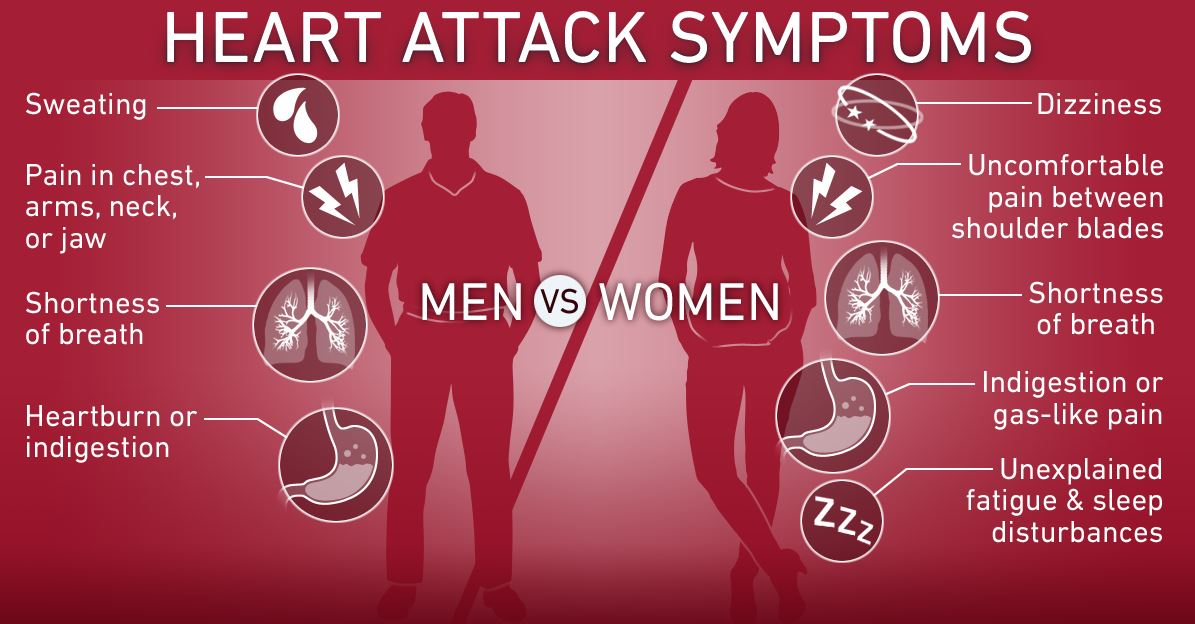

## Analysis Content
1. [Python Libraries](#1)
2. [Data Content](#2)
3. [Read and Analyse Data](#3)
4. [Missing Value Analysis](#4)
5. [Unique Value Analysis](#5)
6. [Categorical Feature Analysis](#6)
7. [Numeric Feature Analysis](#7)
8. [Standardization](#8)
9. [Box Plot Analysis](#9)
10. [Swarm Plot Analysis](#10)
11. [Cat Plot Analysis](#11)
12. [Correlation Analysis](#12)
13. [Outlier Detection](#13)
14. [Modelling](#14)
    1. Encoding Categorical Columns
    1. Scaling
    1. Train/Test Split
    1. Logistic Regression 
    1. Logistic Regression Hyperparameter Tuning

<a id="1"></a>
## Python Libraries
* In this section, we import used libraries during this kernel.

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd 
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve

import warnings 
warnings.filterwarnings("ignore")

<a id="2"></a>
## Data Content
* **Age**: Age of the patient 
* **Sex**: Sex of the patient
* **exang**: exercise induced angina (1=yes; 0=no)
* **ca**: number of major vassels (0-3)
* **cp**: Chest Pain type
    * Value 1: typical angina
    * Value 2: atypical angina 
    * Value 3: non-anginal pain 
    * Value 4: asymptomatic
* **trtbps**: resting blood pressure (in mm Hg)
* **chol**: cholestoral in mg/dl fetched via BMI sensor
* **fbs**: (fasting blood sugar > 120 mg/dl) (1=true; 0=false)
* **rest_ecg**: resting electrocardiographic results 
    * Value 0: normal
    * Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    * Value 3: showing probable or definite left ventricular hypertrophy by Estes' criteria
* **thalach**: maximum heart rate achieved 
* **output**: 0=less chance of heart attack 1=more chance of heart attack

<a id="3"></a>
## Read and Analyse Data

In [2]:
df = pd.read_csv("heart.csv")
df.sample(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
10,54,1,0,140,239,0,1,160,0,1.2,2,0,2,1
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3,0
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3,0
93,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1
148,44,1,2,120,226,0,1,169,0,0.0,2,0,2,1
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2,1
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3,1
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1


In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


<a id="4"></a>
## Missing Value Analysis

In [5]:
df.isnull().sum() # That means there is no (NAN) missing value at all.

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

<a id="5"></a>
## Unique Value Analysis

In [6]:
df["sex"].value_counts().shape[0]

2

In [7]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [8]:
for i in list(df.columns):
    print("{} -- {}".format(i, df[i].value_counts().shape[0]))

age -- 41
sex -- 2
cp -- 4
trtbps -- 49
chol -- 152
fbs -- 2
restecg -- 3
thalachh -- 91
exng -- 2
oldpeak -- 40
slp -- 3
caa -- 5
thall -- 4
output -- 2


<a id="6"></a>
## Categorical Feature Analysis

In [9]:
categorical_list = ["sex", "cp", "fbs", "restecg", "exng", "slp", "thall", "output"]
df_categoric = df.loc[:, categorical_list]

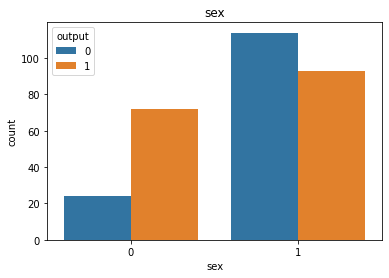

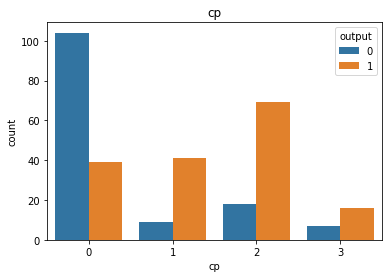

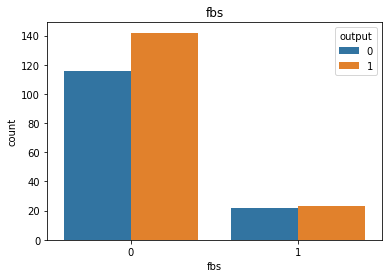

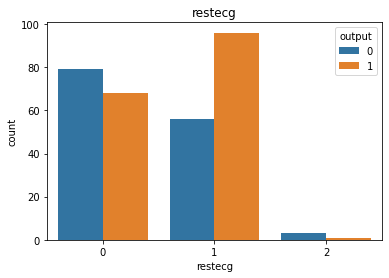

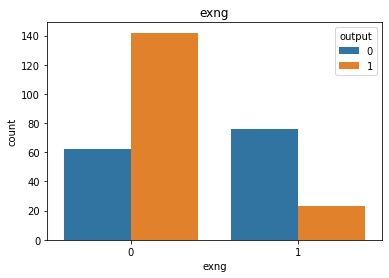

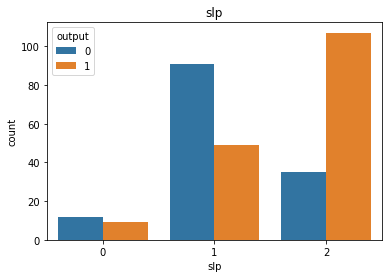

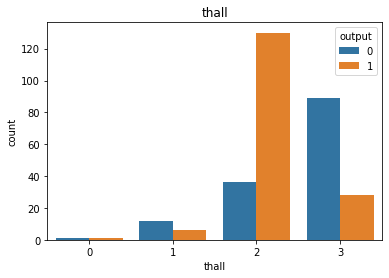

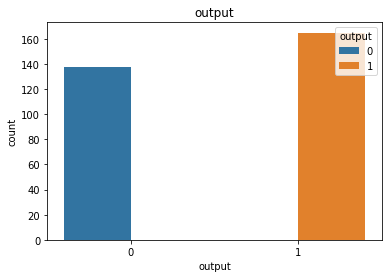

In [10]:
for i in categorical_list:
    plt.figure()
    sns.countplot(x=i, data=df_categoric, hue="output")
    plt.title(i)

<a id="7"></a>
## Numeric Feature Analysis
* Bivariate data analysis with scatter plot 

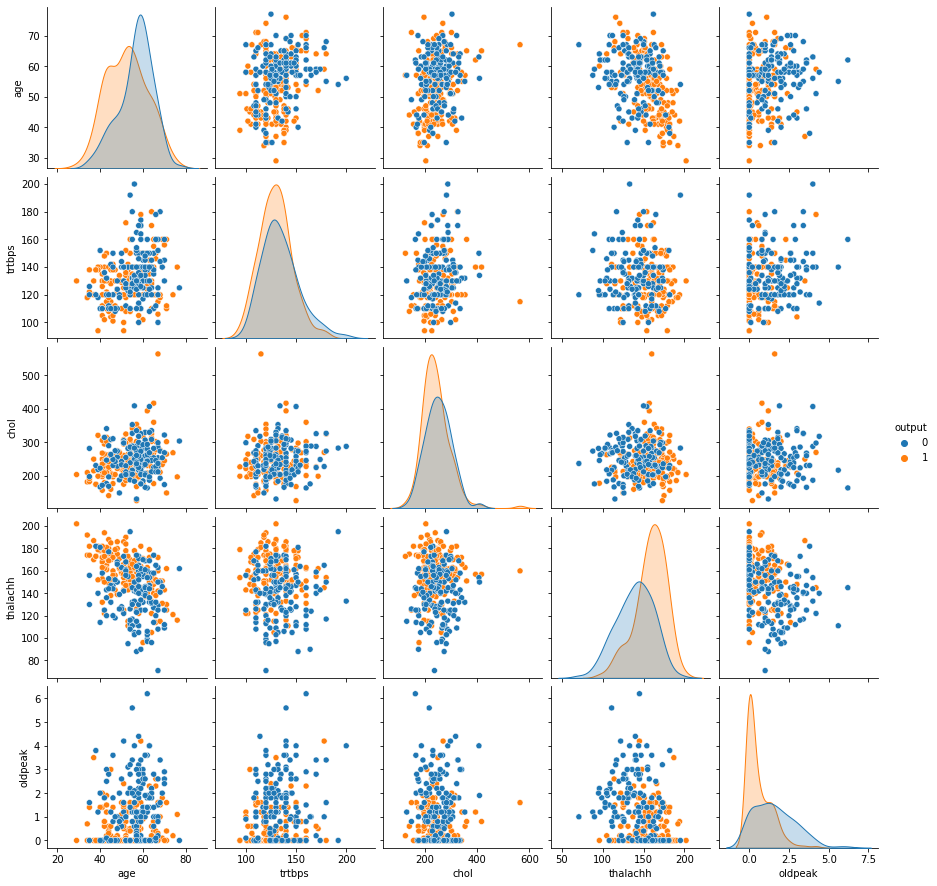

In [11]:
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak", "output"]
df_numeric = df.loc[:,numeric_list]
sns.pairplot(df_numeric, hue="output", diag_kind="kde")
plt.show()

<a id="8"></a>
## Standardization

In [12]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df[numeric_list[:-1]])
scaled_array

array([[ 0.9521966 ,  0.76395577, -0.25633371,  0.01544279,  1.08733806],
       [-1.91531289, -0.09273778,  0.07219949,  1.63347147,  2.12257273],
       [-1.47415758, -0.09273778, -0.81677269,  0.97751389,  0.31091206],
       ...,
       [ 1.50364073,  0.70684287, -1.029353  , -0.37813176,  2.03630317],
       [ 0.29046364, -0.09273778, -2.2275329 , -1.51512489,  0.13837295],
       [ 0.29046364, -0.09273778, -0.19835726,  1.0649749 , -0.89686172]])

In [13]:
# pd.DataFrame(scaled_array).describe()

<a id="9"></a>
## Box Plot Analysis

In [14]:
df_dummy = pd.DataFrame(scaled_array, columns=numeric_list[:-1])
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak
0,0.952197,0.763956,-0.256334,0.015443,1.087338
1,-1.915313,-0.092738,0.072199,1.633471,2.122573
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705
4,0.290464,-0.663867,2.082050,0.583939,-0.379244


In [15]:
df_dummy = pd.concat([df_dummy, df.loc[:, "output"]],axis=1)
df_dummy.head()

,age,trtbps,chol,thalachh,oldpeak,output
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1


In [16]:
data_melted = pd.melt(df_dummy, id_vars="output", var_name="features", value_name="value")
data_melted

,output,features,value
0,1,age,0.952197
1,1,age,-1.915313
2,1,age,-1.474158
3,1,age,0.180175
4,1,age,0.290464
...,...,...,...
1510,0,oldpeak,-0.724323
1511,0,oldpeak,0.138373
1512,0,oldpeak,2.036303
1513,0,oldpeak,0.138373


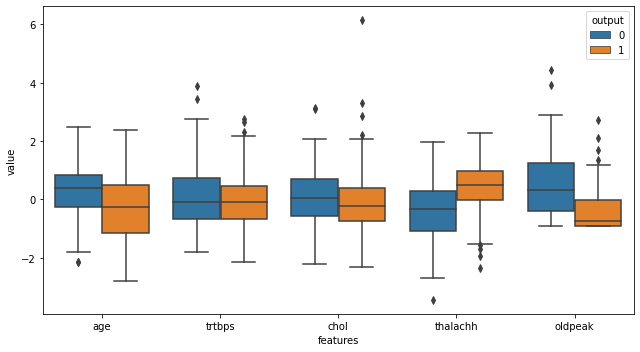

In [17]:
# box plot
plt.figure(figsize=(9,5))
sns.boxplot(x="features", y="value", hue="output", data=data_melted)
plt.tight_layout()
plt.show()

<a id="10"></a>
## Swarm Plot Analysis

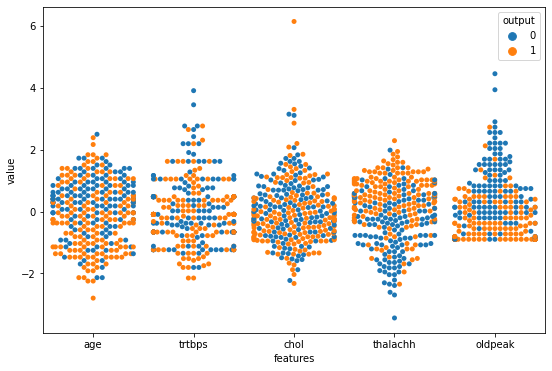

In [18]:
# swarm plot 
plt.figure(figsize=(9,6))
sns.swarmplot(x = "features", y = "value", hue="output", data=data_melted)
plt.show() # bireyleri tek tek inceleme açısından faydalı bir içerik (swarmplot)

<a id="11"></a>
## Cat Plot Analysis

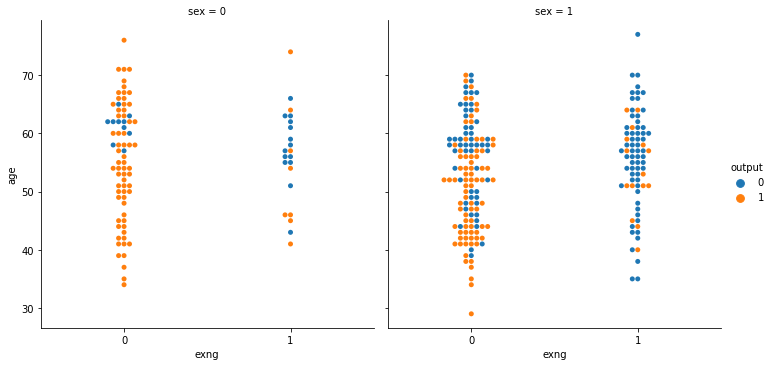

In [19]:
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="swarm", data=df)

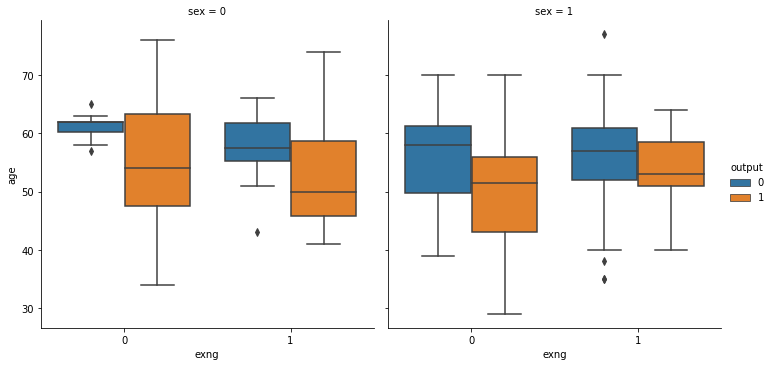

In [20]:
sns.catplot(x="exng", y="age", hue="output", col="sex", kind="box", data=df)

<a id="12"></a>
## Correlation Analysis

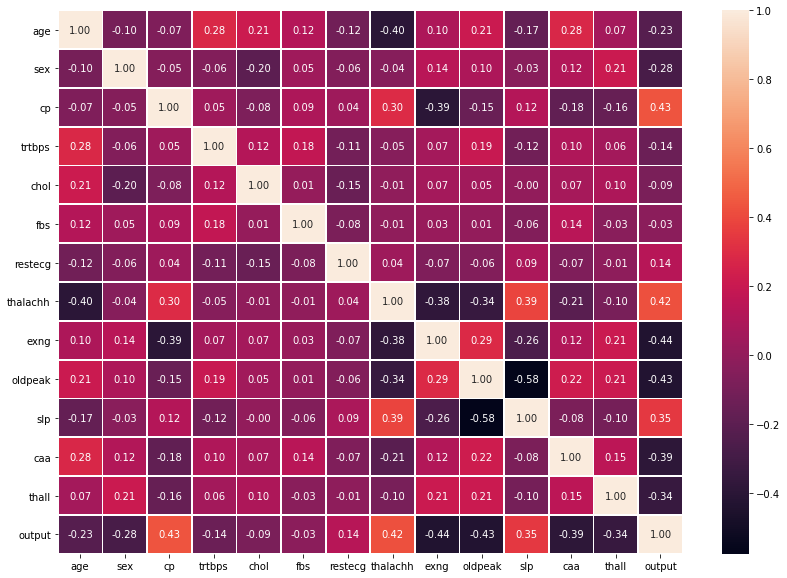

In [21]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=.7)
plt.show()

<a id="13"></a>
## Outlier Detection
* Outliers can distrupt ML process
* 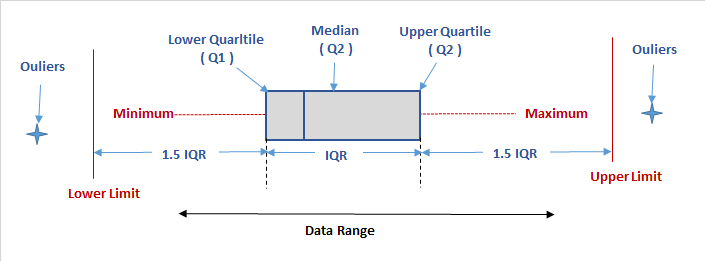

In [22]:
numeric_list = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
df_numeric = df.loc[:,numeric_list]
df_numeric.head()

,age,trtbps,chol,thalachh,oldpeak
0,63,145,233,150,2.3
1,37,130,250,187,3.5
2,41,130,204,172,1.4
3,56,120,236,178,0.8
4,57,120,354,163,0.6


In [23]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [24]:
#outlier detection 
for i in numeric_list: 
    # IQR 
    Q1 = np.percentile(df.loc[:,i],25)
    Q3 = np.percentile(df.loc[:,i],75)
    
    IQR = Q3 - Q1
    
    print("Old shape: ", df.loc[:, i].shape)
    
    # upper bound 
    upper = np.where(df.loc[:, i] >= (Q3 + 1.5*IQR))
    
    # lower bound 
    lower = np.where(df.loc[:, i] <= (Q1 - 1.5*IQR))
    
    print("{} -- {}".format(upper, lower))
    
    try:
        df.drop(upper[0], inplace=True)
    except: print("KeyError: {} not found in axis".format(upper[0]))
  
    try:
        df.drop(lower[0], inplace=True)
    except: print("KeyError: {} not found in axis".format(lower[0]))
    
    print("New shape: ", df.shape)

Old shape:  (303,)
(array([], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (303, 14)
Old shape:  (303,)
(array([  8, 101, 110, 152, 195, 203, 223, 228, 241, 248, 260, 266, 292],
      dtype=int64),) -- (array([], dtype=int64),)
New shape:  (290, 14)
Old shape:  (290,)
(array([ 27,  84,  95, 214, 237], dtype=int64),) -- (array([], dtype=int64),)
New shape:  (285, 14)
Old shape:  (285,)
(array([], dtype=int64),) -- (array([255], dtype=int64),)
New shape:  (284, 14)
Old shape:  (284,)
(array([195, 210, 211, 235, 273, 276], dtype=int64),) -- (array([], dtype=int64),)
KeyError: [195 210 211 235 273 276] not found in axis
New shape:  (284, 14)


<a id="14"></a>
## Modelling 

In [25]:
df1 = df.copy()

### Encoding Categorical Columns
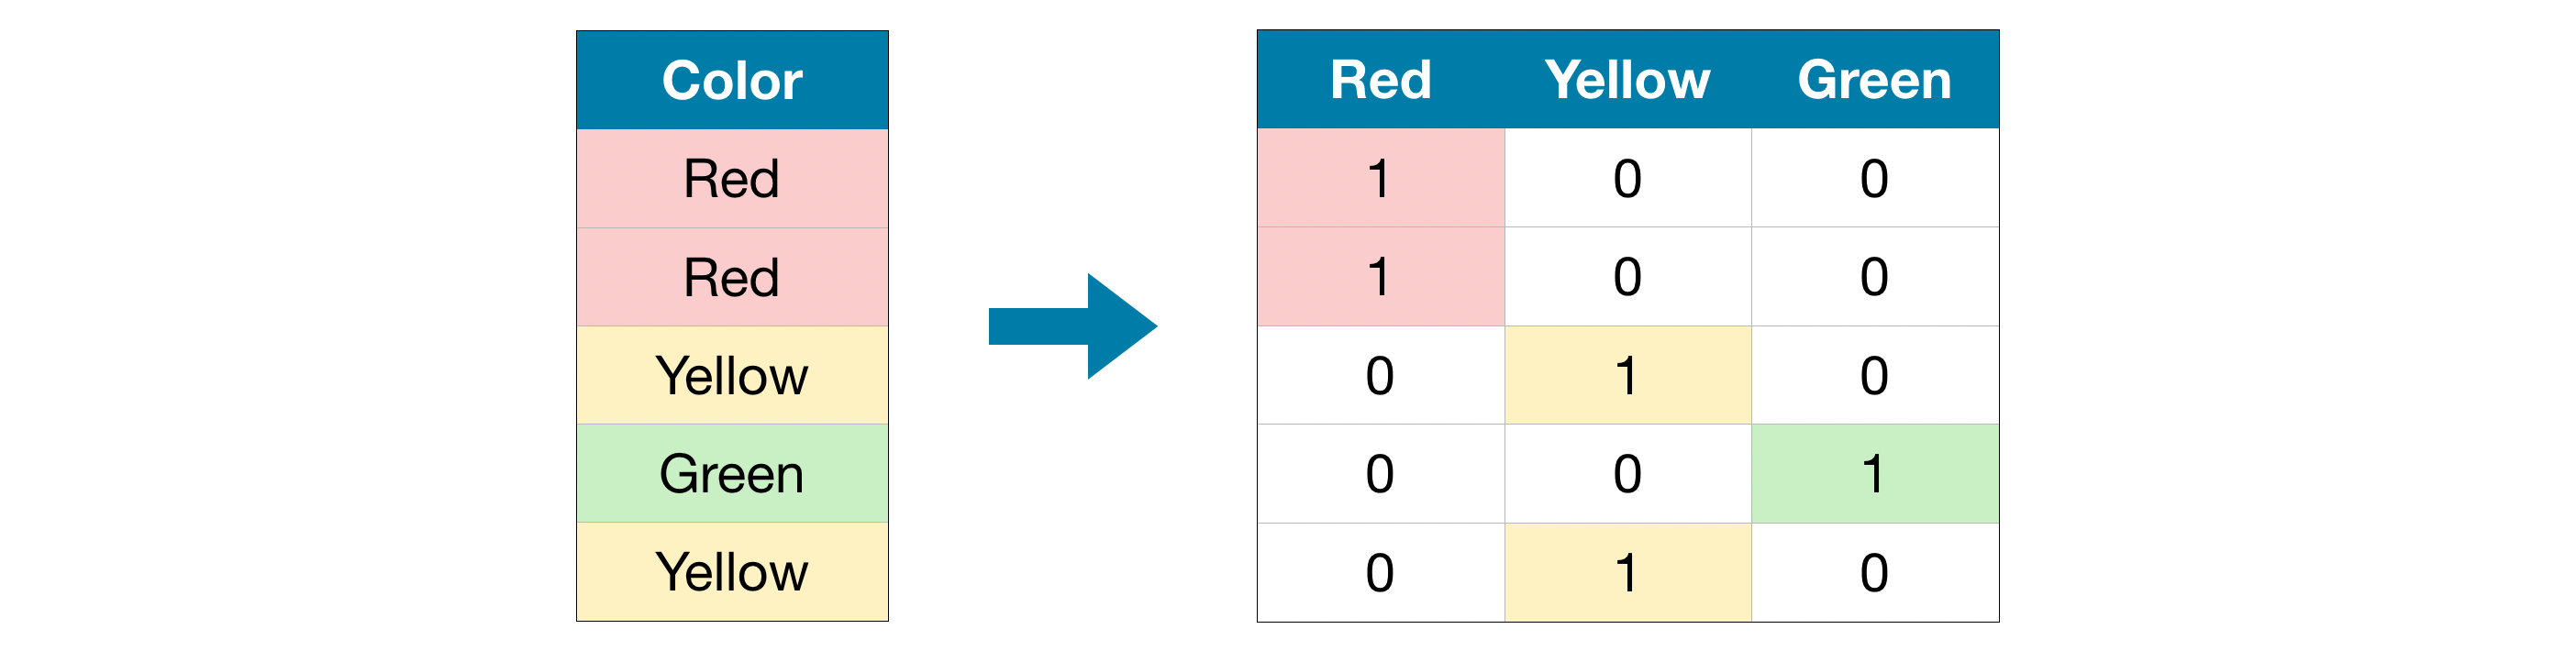

In [26]:
df1 = pd.get_dummies(df1, columns = categorical_list[:-1], drop_first = True)
df1.head()

,age,trtbps,chol,thalachh,oldpeak,caa,output,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0


In [32]:
X = df1.drop(["output"], axis=1)
y = df1[["output"]]

### Scaling 

In [42]:
scaler = StandardScaler()
scaled_array = scaler.fit_transform(X[numeric_list[:-1]])
X.head()

,age,trtbps,chol,thalachh,oldpeak,caa,sex_1,cp_1,cp_2,cp_3,fbs_1,restecg_1,restecg_2,exng_1,slp_1,slp_2,thall_1,thall_2,thall_3
0,63,145,233,150,2.3,0,1,0,0,1,1,0,0,0,0,0,1,0,0
1,37,130,250,187,3.5,0,1,0,1,0,0,1,0,0,0,0,0,1,0
2,41,130,204,172,1.4,0,0,1,0,0,0,0,0,0,0,1,0,1,0
3,56,120,236,178,0.8,0,1,1,0,0,0,1,0,0,0,1,0,1,0
4,57,120,354,163,0.6,0,0,0,0,0,0,1,0,1,0,1,0,1,0


### Train/Test Split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 3)

In [45]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (255, 19)
x_test: (29, 19)
y_train: (255, 1)
y_test: (29, 1)


### Logistic Regression

In [53]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [54]:
# calculate posibility
y_pred_prob = logreg.predict_proba(x_test)
y_pred_prob

array([[0.00785171, 0.99214829],
       [0.67829372, 0.32170628],
       [0.02991673, 0.97008327],
       [0.22310634, 0.77689366],
       [0.31162745, 0.68837255],
       [0.03046056, 0.96953944],
       [0.25409427, 0.74590573],
       [0.08532971, 0.91467029],
       [0.27572046, 0.72427954],
       [0.67001604, 0.32998396],
       [0.90763278, 0.09236722],
       [0.99449467, 0.00550533],
       [0.26750636, 0.73249364],
       [0.17236909, 0.82763091],
       [0.07096653, 0.92903347],
       [0.07012989, 0.92987011],
       [0.20958499, 0.79041501],
       [0.98571857, 0.01428143],
       [0.91524786, 0.08475214],
       [0.23571224, 0.76428776],
       [0.01259278, 0.98740722],
       [0.94506213, 0.05493787],
       [0.21118046, 0.78881954],
       [0.58744266, 0.41255734],
       [0.98850973, 0.01149027],
       [0.01807266, 0.98192734],
       [0.12132898, 0.87867102],
       [0.04532072, 0.95467928],
       [0.86628053, 0.13371947]])

In [58]:
y_pred = np.argmax(y_pred_prob, axis=1)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0], dtype=int64)

In [60]:
dummy_ = pd.DataFrame(y_pred_prob)
dummy_["y_pred"] = y_pred
dummy_.head(10)

,0,1,y_pred
0,0.007852,0.992148,1
1,0.678294,0.321706,0
2,0.029917,0.970083,1
3,0.223106,0.776894,1
4,0.311627,0.688373,1
5,0.030461,0.969539,1
6,0.254094,0.745906,1
7,0.085330,0.914670,1
8,0.275720,0.724280,1
9,0.670016,0.329984,0


In [62]:
print("Test Accuracy: {}".format(accuracy_score(y_pred, y_test)))

Test Accuracy: 0.896551724137931


####  ROC Curve
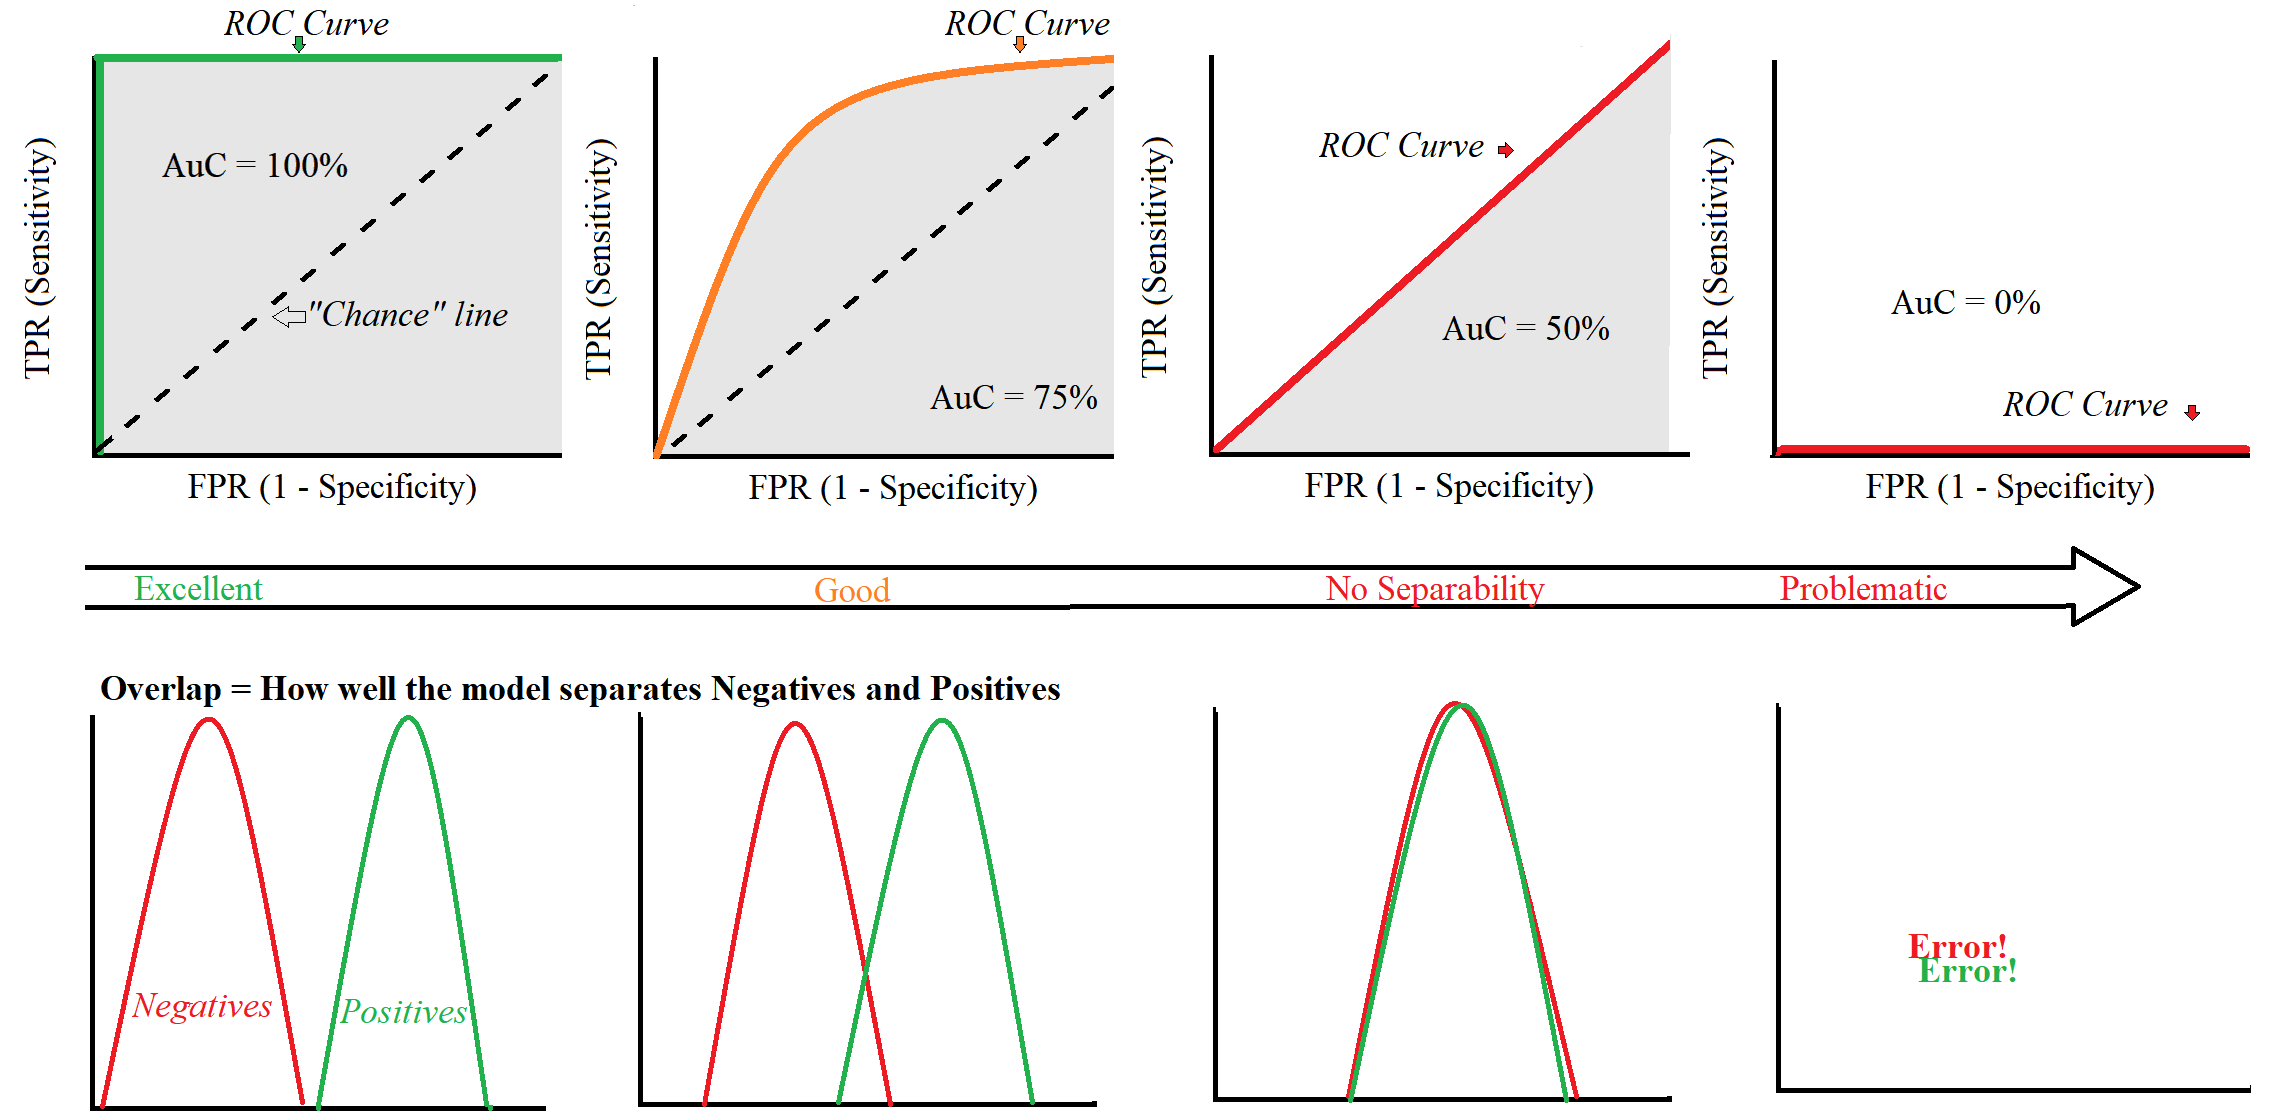

In [65]:
fpr, tpr, threshold = roc_curve(y_test, y_pred_prob[:,1])

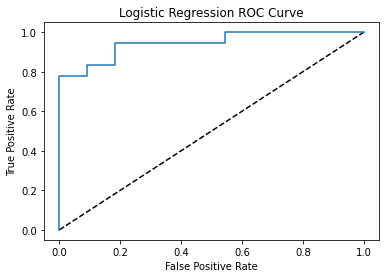

In [66]:
plt.plot([0,1],[0,1],"k--")
plt.plot(fpr, tpr, label = "Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.show()

### Logistic Regression Hyperparameter Tuning

In [104]:
lr = LogisticRegression()

penalty = ["l1","l2"]
C = [1,2,3,4,5]
tol = [0.1, 0.01, 0.001, 0.0001]

parameters = {'penalty':penalty,
              'C':C,
              'tol':tol}

lr_searcher = GridSearchCV(lr, parameters, cv=10, verbose=1)
lr_searcher.fit(x_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5], 'penalty': ['l1', 'l2'],
                         'tol': [0.1, 0.01, 0.001, 0.0001]},
             verbose=1)

In [105]:
print("Best Parameters: {}".format(lr_searcher.best_params_))

Best Parameters: {'C': 2, 'penalty': 'l2', 'tol': 0.1}


In [106]:
lr_searcher.score(x_test, y_test)

0.896551724137931

<a id="15"></a>
## Conclusion
* Lets make a practice now!
* You can make different analyzes to reinforce what I learned.

## ANN

In [ ]:
x = df.drop(["output"],axis=1)
y = df.output

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, MaxPooling2D

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
model = Sequential()
model.add(Dense(64, activation="relu", input_shape=(13,)))
model.add(Dense(32, activation="relu"))
model.add(Dense(16, activation="relu"))
model.add(Dense(8, activation="relu"))
model.add(Flatten())
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics="accuracy")

history = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_data=(x_test, y_test))

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(y=history.history["loss"],x=np.arange(100), label="Loss")
plt.scatter(y=history.history["accuracy"],x=np.arange(100), label="Accuracy")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.legend()
#plt.xlim(80,100)
plt.ylim(0,1)
plt.ylim()
plt.grid()
plt.show()

In [ ]:
model.summary()

In [ ]:
model.evaluate(x_test, y_test)